# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (15)

**11/12/2023**

## Clasificación con métodos Bayesianos (clasificador _Naive Bayes_) 

Los métodos **[Naïve Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)** o __clasificadores Bayesianos ingenuos__ son un conjunto de algoritmos de aprendizaje supervisado basados en la aplicación del __[teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem)__ que vincula la probabilidad de un evento aleatorio ___A___ dado ___B___ con la probabilidad del evento ___B___ dado ___A___. El enunciado del teorema de _Bayes_ expresa de esta forma la __probablilidad condocional__: 


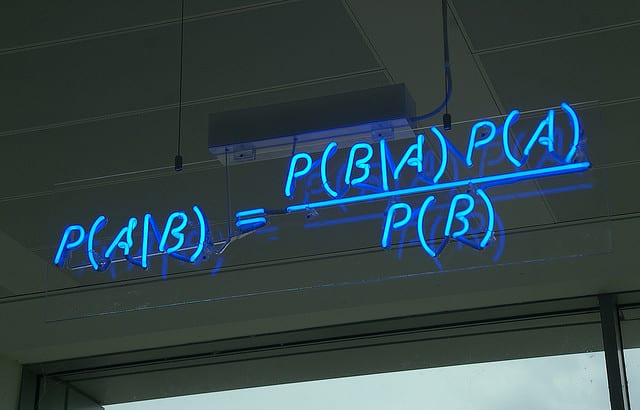

Si la variable de clase es $y$ y el vector de características dependientes o las variables de entrada son de $x_1$ a $x_n$, tenemos:

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$

Estos métodos cuentan con la suposición de que __todos los _features_ o predictores son independientes entre sí__, es decir, la presencia o ausencia de una característica en una clase es independiente de la presencia o ausencia de cualquier otra característica en la misma clase. Esta es una suposición simplicista, por eso se denominan métodos _Naïve Bayes_:

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

Usando esta simplificación, podemos llegar a establecer una __regla de decisión__ para calcular la clase más probable, dado las cracterísticas particulares de cada observación ($x_1$,$x_2$... $x_n$):



$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$

Los diferentes clasificadores de Naive Bayes (por ejemplo _Gaussian_, _Bernoulli_) se diferencian principalmente por __las suposiciones que hacen con respecto a la distribución de las variables de entrada__ $P(x_i | y)$. A pesar de sus suposiciones aparentemente demasiado simplificadas, estos métodos suelen funcionar bastante bien en muchos casos de uso del mundo real, como la _clasificación de documentos_ y el _filtrado de spam_. 

La ventaja principal de estos clasificadores es que __requieren una pequeña cantidad de datos de entrenamiento__ para estimar los parámetros, por ser __modelos probabilísticos__. Por esta misma razón, pueden ser __considerablemente rápidos__ en comparación con métodos más sofisticados, sobretodo en conjunto de datos que sufren de una __alta dimensionalidad__.

### Gaussian Naive Bayes

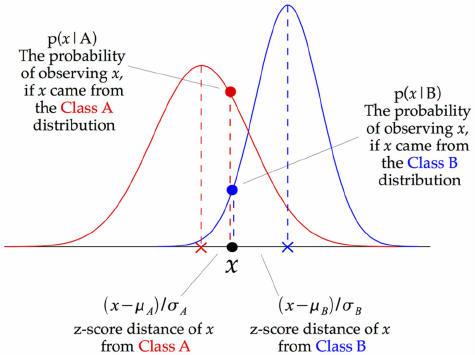

___GaussianNB___ implementa el algoritmo _Naïve Bayes_ para la clasificación, suponiendo que la probabilidad de las características es _Gausiana_:

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

Los parámetros de la función se estiman utilizando la **[máxima verosimilitud](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (_Maximum Likelihood_)**.

### Ejemplo de la calidad del aire

En los últimos años, los **altos niveles de contaminación** durante ciertos periodos secos en **Madrid** ha obligado a las autoridades a tomar medidas contra el uso de automóviles en el centro de la ciudad, y ha sido utilizado como razón para **proponer modificaciones drásticas en el urbanismo de la ciudad**. 

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de calidad del aire están públicamente disponibles e incluyen **datos históricos diarios y horarios de los niveles registrados desde 2001 hasta 2018** y la lista de estaciones que se utilizan para el análisis de contaminación.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran la **calidad del aire** en varias estaciones de **Madrid** según diferentes variables.

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos preparados y preprocesados para el modelo

In [3]:
# Cargar el dataset desde un archivo

df_aire_calidad = pd.read_csv('Calidad_aire_procesado.csv')

In [4]:
# Consultar los registros del DataFrame
df_aire_calidad

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,635,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,493.727273,...,21.0,21.0,21.0,10.9,10,1,0,1,1,1
1,635,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,500.659091,...,20.6,20.6,20.6,11.1,10,1,1,1,1,1
2,635,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,458.159091,...,20.1,20.1,20.1,11.2,10,1,2,1,1,1
3,635,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,338.454545,...,19.7,19.7,19.7,11.4,10,1,3,1,1,0
4,635,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,282.681818,...,19.5,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,601.100000,...,11.0,11.0,12.1,-7.0,2,22,16,5,1,1
49250,599,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,641.575000,...,9.4,9.4,11.0,-6.6,2,22,17,5,1,1
49251,599,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,699.375000,...,7.7,7.7,9.8,-6.2,2,22,18,5,1,1
49252,599,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,673.100000,...,6.6,6.6,8.8,-5.9,2,22,19,5,3,1


In [5]:
# La información útil sobre los datos guardados en formato DataFrame
df_aire_calidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49254 entries, 0 to 49253
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ALTITUD                      49254 non-null  int64  
 1   Distancia_Pto_trafico1       49254 non-null  float64
 2   Intensidad_Pto_trafico1      49254 non-null  float64
 3   Intensidad_Pto_trafico2      49254 non-null  float64
 4   Intensidad_Pto_trafico3      49254 non-null  float64
 5   Intensidad_Pto_trafico4      49254 non-null  float64
 6   Intensidad_Pto_trafico5      49254 non-null  float64
 7   Carga_Pto_trafico4           49254 non-null  float64
 8   Carga_Pto_trafico3           49254 non-null  float64
 9   Intensidad_mediaR1_500       49254 non-null  float64
 10  Intensidad_mediaR3_750_1000  49254 non-null  float64
 11  Intensidad_mediaR6_2000      49254 non-null  float64
 12  Intensidad_minR1_500         49254 non-null  float64
 13  Intensidad_minR2_500_

### Planteamiento del ejercicio de clasificación

Se ha creado una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25 o el primer cuartil (Q1)** de la variable objetivo original (`Calidad_NO2`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25 o el primer cuartil (Q1)**.  

Procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**


In [6]:
df_aire_calidad.describe()

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,661.735027,140.003163,348.427424,307.270861,465.780060,396.266552,415.983267,24.459218,19.582406,388.981257,...,10.142878,10.158558,11.595022,2.455007,5.857250,15.798656,11.479433,3.972429,1.639258,0.759857
std,34.497321,98.958425,385.365535,311.674022,781.171063,363.917301,395.422520,18.969057,17.162813,304.860574,...,7.045263,7.096225,6.109079,4.533624,4.334602,8.726627,6.935243,2.008118,1.022857,0.427174
min,599.000000,48.351595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,...,-2.600000,-2.600000,0.300000,-11.700000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,635.000000,71.219285,61.500000,71.000000,89.250000,84.000000,72.750000,8.000000,6.000000,146.391667,...,4.800000,4.800000,7.100000,-0.800000,2.000000,8.000000,5.000000,2.000000,1.000000,1.000000
50%,670.000000,86.018742,208.750000,193.000000,269.000000,276.875000,309.000000,20.000000,14.250000,326.584350,...,8.700000,8.700000,10.300000,2.400000,4.000000,16.000000,11.000000,4.000000,2.000000,1.000000
75%,693.000000,168.527832,476.750000,446.500000,669.750000,649.000000,647.000000,38.250000,29.000000,560.473438,...,14.500000,14.500000,14.700000,5.800000,11.000000,23.000000,17.000000,6.000000,2.000000,1.000000
max,708.000000,407.571507,2844.250000,1950.000000,30660.000000,3121.750000,2307.000000,100.000000,100.000000,2632.795833,...,31.400000,33.500000,31.400000,16.500000,12.000000,31.000000,23.000000,7.000000,3.000000,1.000000


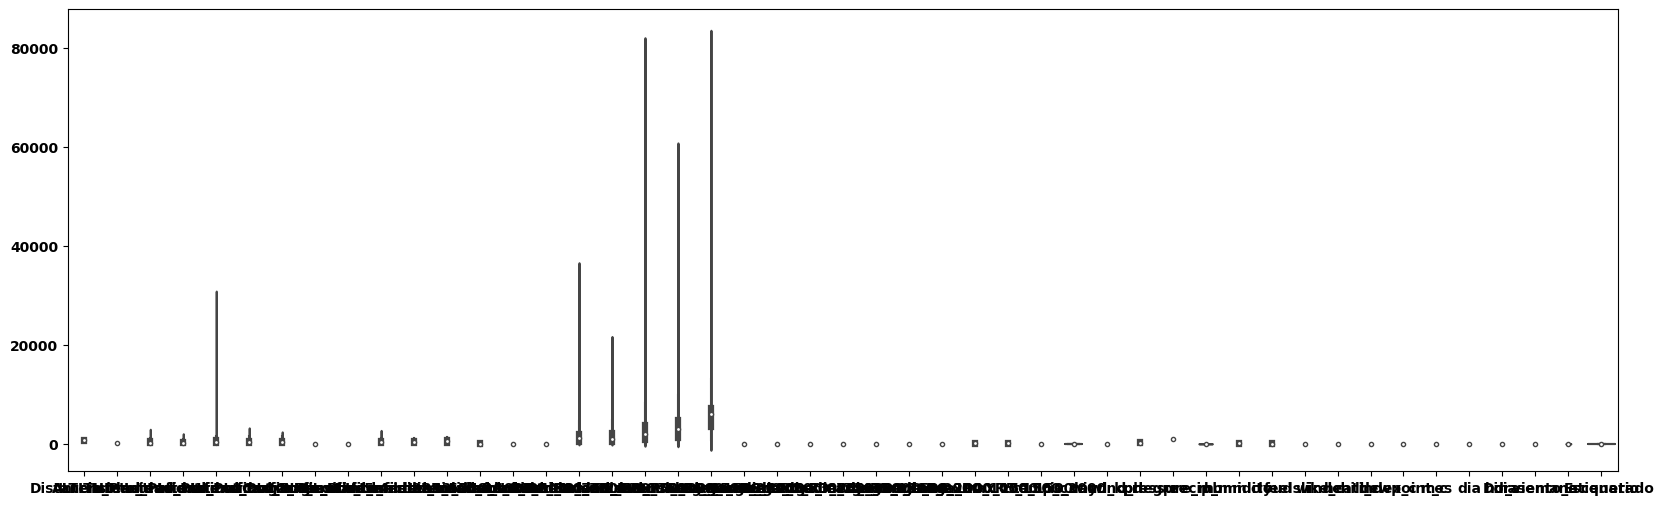

In [7]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_aire_calidad, orient='v')
plt.show()

In [8]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [9]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [10]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [11]:
X_normal.describe().round(4)

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
count,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,...,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000
mean,0.5756,0.2551,0.1225,0.1576,0.0152,0.1269,0.1803,0.2446,0.1958,0.1469,...,0.3238,0.3748,0.3534,0.3632,0.5020,0.4416,0.4933,0.4991,0.4954,0.5464
std,0.3165,0.2755,0.1355,0.1598,0.0255,0.1166,0.1714,0.1897,0.1716,0.1159,...,0.3392,0.2072,0.1966,0.1964,0.1608,0.3941,0.2909,0.3015,0.3347,0.3410
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3303,0.0637,0.0216,0.0364,0.0029,0.0269,0.0315,0.0800,0.0600,0.0547,...,0.0300,0.2176,0.2050,0.2186,0.3865,0.0909,0.2333,0.2174,0.1667,0.3333
50%,0.6514,0.1049,0.0734,0.0990,0.0088,0.0887,0.1339,0.2000,0.1425,0.1232,...,0.1800,0.3324,0.3130,0.3215,0.5000,0.2727,0.5000,0.4783,0.5000,0.6667
75%,0.8624,0.3345,0.1676,0.2290,0.0218,0.2079,0.2805,0.3825,0.2900,0.2121,...,0.6100,0.5029,0.4737,0.4630,0.6206,0.9091,0.7333,0.7391,0.8333,0.6667
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


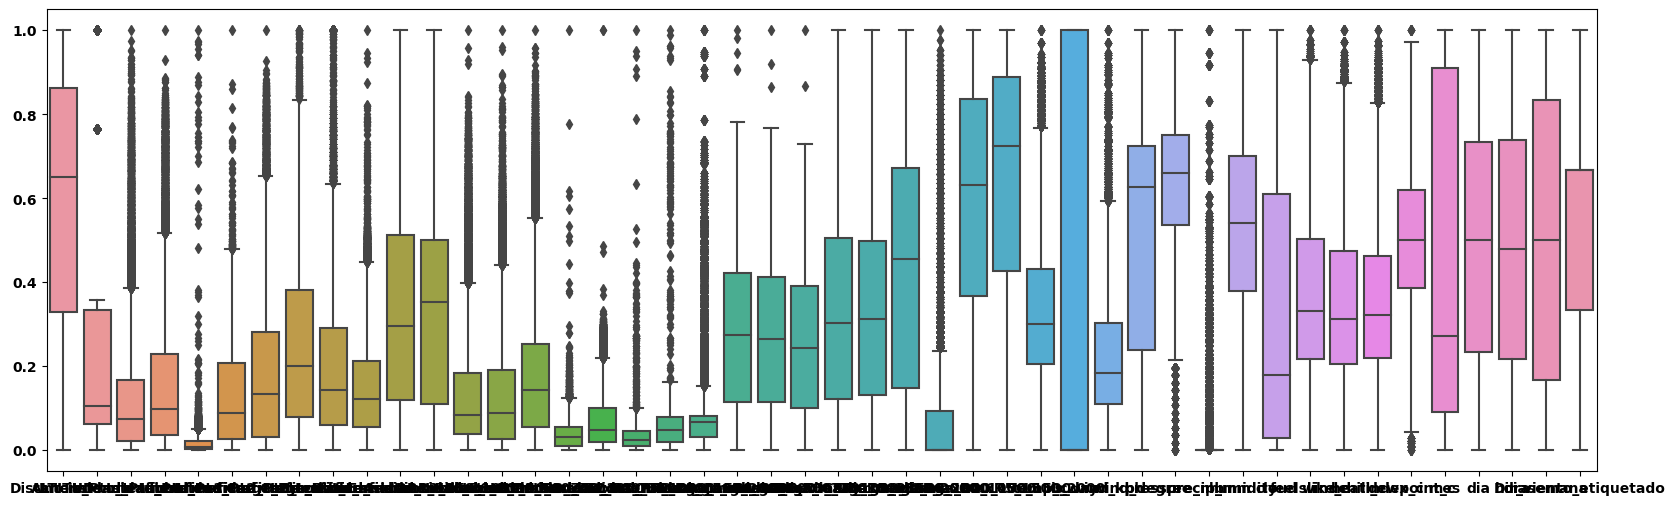

In [12]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test set

In [13]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [14]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

39403
9851


49254

#### **Paso 3.** Cargar y elegir el clasificador __Gaussian Naive Bayes (GaussianNB)__

In [15]:
# Importar el módulo que corresponde al algoritmo
from sklearn.naive_bayes import GaussianNB

# Asignar el algoritmo que vamos a aplicar 
clas_gnb = GaussianNB()

### **Paso 4.** Entrenar el modelo de clasificación Bayesiana con los datos de entrenamiento

In [16]:
# Entrenar el modelo
clas_gnb.fit(X_train, y_train)

GaussianNB()

Ahora que el modelo está entrenado, sacamos las predicciones, analizamos los resultados y obtenemos algunas métricas del modelo basadas en el conjunto de datos de prueba. Según las métricas, podremos observar si el modelo clasificó correctamente todas las especies.

### **Paso 5.** Obtener las predicciones 

In [17]:
# Calcular las predicciones con el conjunto de prueba
y_pred = clas_gnb.predict(X_test)

In [18]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[0 1 1 ... 1 1 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.647142422089128

Existen otra serie de metricas para calificar los modelos de clasificación que se detallan a continuación. Algunas de estas medidas se resumen en un informe llamado **classification_report**.

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.73      0.50      2404
           1       0.88      0.62      0.73      7447

    accuracy                           0.65      9851
   macro avg       0.63      0.68      0.61      9851
weighted avg       0.76      0.65      0.67      9851



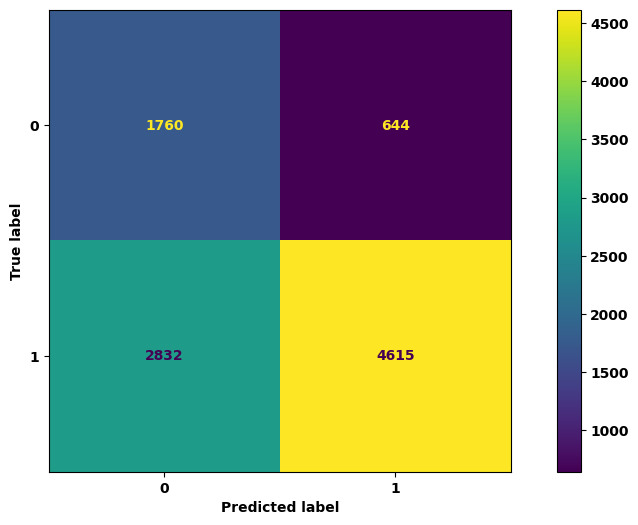

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=clas_gnb.classes_)
disp.plot()

plt.show()

In [22]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6759128903597625

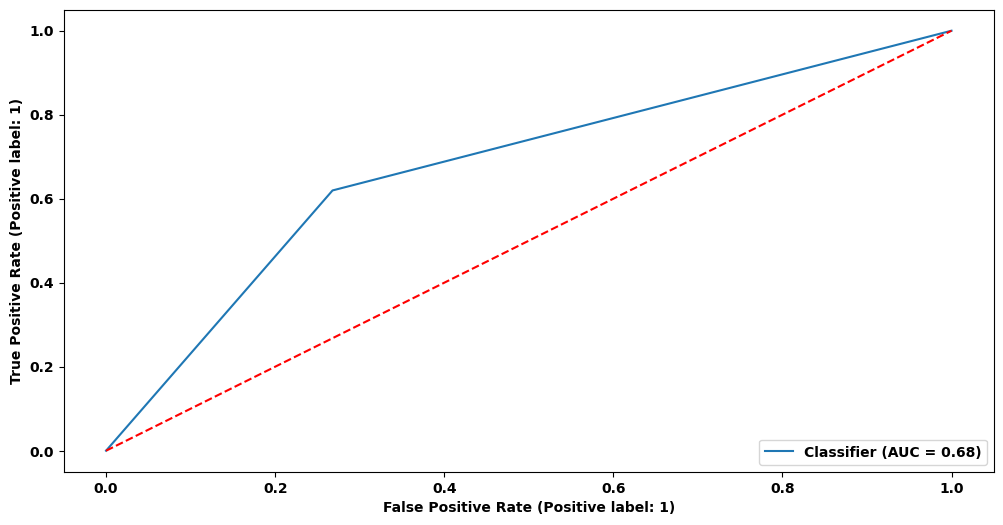

In [23]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.show()

Existen otra serie de algoritmos dentro del conjunto de los métodos de _Naïve Bayes_ que cada uno se ajusta mejor en función de las características de los datos de entrenamiento:

- __MultinomialNB__: Suelen funcionar mejor con los datos no contínuas (**variables discretas/categóricas**).
- __ComplementNB__: Suelen funcionar mejor con el conjunto de **datos desequilibrados**.
- __BernoulliNB__: Suelen funcionar mejor con los **datos binarios**.
- __CategoricalNB__: Suelen funcionar mejor con los **datos categóricos**.



In [24]:
from sklearn.naive_bayes import MultinomialNB

clas_mnb = MultinomialNB()

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_mnb.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_mnb = clas_mnb.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_mnb))

print(classification_report(y_test, y_pred_mnb))

print('AUC:', roc_auc_score(y_test, y_pred_mnb))


Acuuracy: 0.7977870266977972
              precision    recall  f1-score   support

           0       0.72      0.28      0.40      2404
           1       0.81      0.97      0.88      7447

    accuracy                           0.80      9851
   macro avg       0.76      0.62      0.64      9851
weighted avg       0.79      0.80      0.76      9851

AUC: 0.6220286698213688


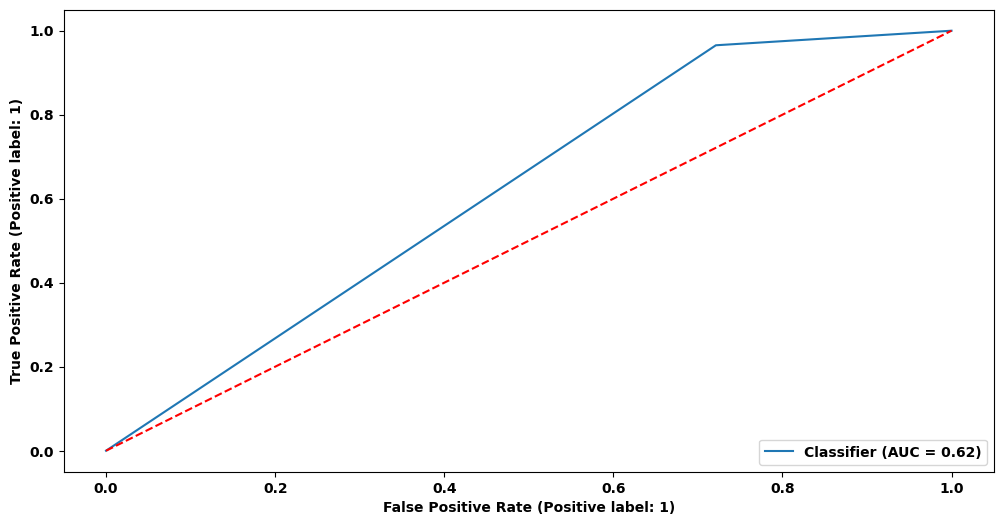

In [25]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_mnb)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.show()

Los clasificadores Naive Bayes generalmente **no son propensos a _Overfitting_**, salvo cuando los datos tienen muchos **ruidos (_noisy data_)** o cuando hay muy **pocas observaciones** para el entrenamiento.

In [26]:
# Score:  Accuracy que representa el porcentaje de los aciertos en total
print("Aciertos en entrenamiento:", clas_mnb.score(X_train,y_train))
print("Aciertos prueba (test):", clas_mnb.score(X_test,y_test))

Aciertos en entrenamiento: 0.7994315153668502
Aciertos prueba (test): 0.7977870266977972


Para asegurarnos y tener una visión del grado de posible sobreajuste que puede tener el modelo, podemos analizar su rendimiento frente al tamaño de los datos utilizados en entrenamiento (**Learning Curve**). 

La diferencia final del rendimiento del modelo entre training y test es=  0.0016444886690529792


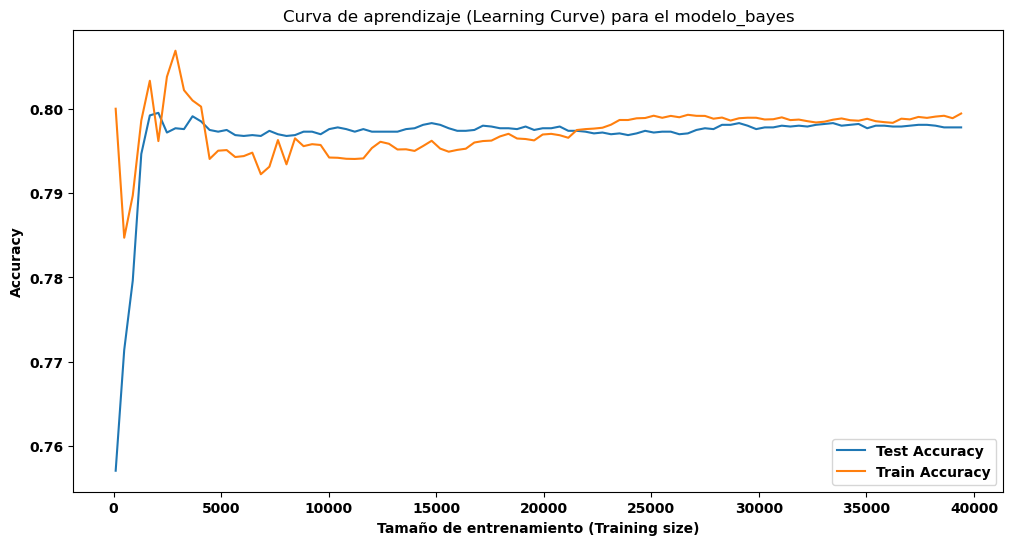

In [27]:
# Generar la estructura del modelo
modelo_bayes = MultinomialNB()

# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)

for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    modelo_bayes.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el rendimiento del modelo para los datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_bayes.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, modelo_bayes.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el modelo_bayes')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()    


Se puede observar que este modelo más que *Overfitting* sufre de un posible *Underfitting*, quizá por las suposiciones simplificatorias que ha tomado el modelo de _Naïve Bayes Classifier_. 

---

### **`Ejercicio 15.1`**

**`15.1.1`** Construye con el mismo dataset otros dos modelos de clasificación usando las técnicas de __Complement Naive Bayes__ y __Naive Bayes classifier for multivariate Bernoulli models__. Después, calcula diferentes métricas para evaluar estos nuevos modelo y analiza su rendimiendo en comparación con modelos anteriores desarrollados en la sesión.
- Accuracy
- Classification report
- AUC

**`15.1.2`** Saca la gráfica de el *Learning Curve* para los dos nuevos modelos calculando el área bajo la curva de funcionamiento del receptor para los datos de _train_ y de _test_, y explica si alguno tiene preferencia o no, comparando con modelos anteriores.

In [28]:
## Solución
# Ejercicio 15.1.1
from sklearn.naive_bayes import ComplementNB
modelo_complement_15_1 = ComplementNB()

modelo_complement_15_1.fit(X_train, y_train)

y_pred_complement_15_1 = modelo_complement_15_1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_complement_15_1))

print(classification_report(y_test, y_pred_complement_15_1))

print('AUC:', roc_auc_score(y_test, y_pred_complement_15_1))



Accuracy: 0.6697797177951477
              precision    recall  f1-score   support

           0       0.40      0.71      0.51      2404
           1       0.87      0.66      0.75      7447

    accuracy                           0.67      9851
   macro avg       0.64      0.68      0.63      9851
weighted avg       0.76      0.67      0.69      9851

AUC: 0.6827163201208676


In [29]:
from sklearn.naive_bayes import BernoulliNB
modelo_bernoulli_15_1 = BernoulliNB()

modelo_bernoulli_15_1.fit(X_train, y_train)

y_pred_bernoulli_15_1 = modelo_bernoulli_15_1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_bernoulli_15_1))

print(classification_report(y_test, y_pred_bernoulli_15_1))

print('AUC:', roc_auc_score(y_test, y_pred_bernoulli_15_1))


Accuracy: 0.7635773017967719
              precision    recall  f1-score   support

           0       0.55      0.18      0.27      2404
           1       0.78      0.95      0.86      7447

    accuracy                           0.76      9851
   macro avg       0.67      0.56      0.56      9851
weighted avg       0.72      0.76      0.71      9851

AUC: 0.5648949470322391


#### Análisis 15.1.1
El modelo del ejercicio con la técnica de Complement Naive Bayes tiene valores muy parecidos al primer modelo de la sesión, es cierto que mejora un poco pero mínimamente.

El modelo del ejercicio con la técnica de Naive Bayes classifier for multivariate Bernoulli models es un modelo algo mejor que el anterior pero no lo suficiente como para mejorar al segundo modelo de la sesión.

La diferencia final del rendimiento del modelo entre training y test es=  0.009851064059943626


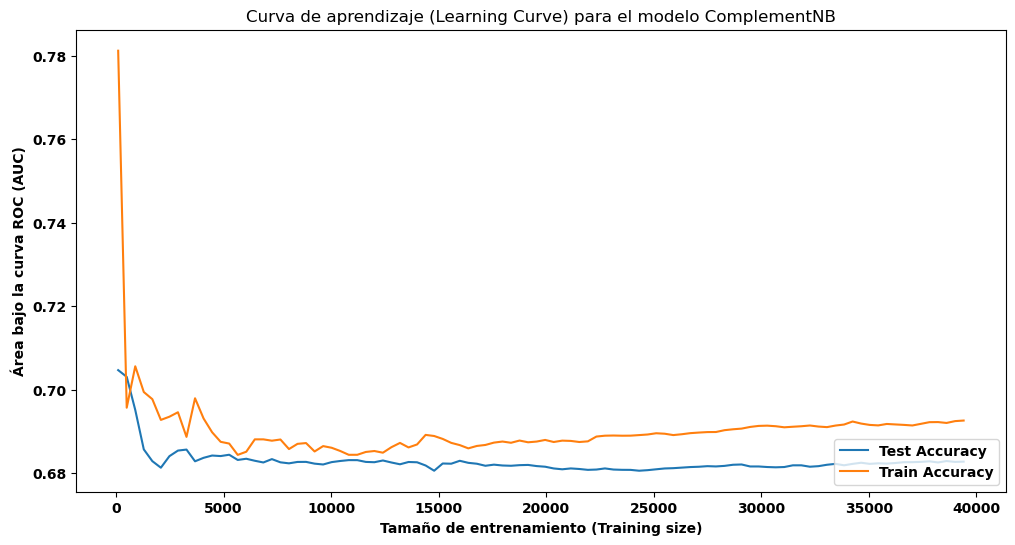

In [30]:
## Solución
# Ejercicio 15.1.2
num_samples_15_1_2 = np.linspace(100,X_train.shape[0],100).astype(int)

train_score_15_1_2 = np.zeros(num_samples_15_1_2.size) 
test_score_15_1_2 = np.zeros(num_samples_15_1_2.size)

for i in range(num_samples_15_1_2.size):
    modelo_complement_15_1.fit(X_train[:num_samples_15_1_2[i]], y_train[:num_samples_15_1_2[i]])

    train_score_15_1_2[i] = roc_auc_score(y_train[:num_samples_15_1_2[i]], modelo_complement_15_1.predict(X_train[:num_samples_15_1_2[i]])) 
    test_score_15_1_2[i] = roc_auc_score(y_test, modelo_complement_15_1.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_15_1_2[-1]-test_score_15_1_2[-1])

plt.plot(num_samples_15_1_2, test_score_15_1_2, label = 'Test Accuracy')
plt.plot(num_samples_15_1_2, train_score_15_1_2, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el modelo ComplementNB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Área bajo la curva ROC (AUC)')
plt.legend(loc = 'lower right')
plt.show()

La diferencia final del rendimiento del modelo entre training y test es=  -0.0014772506691198561


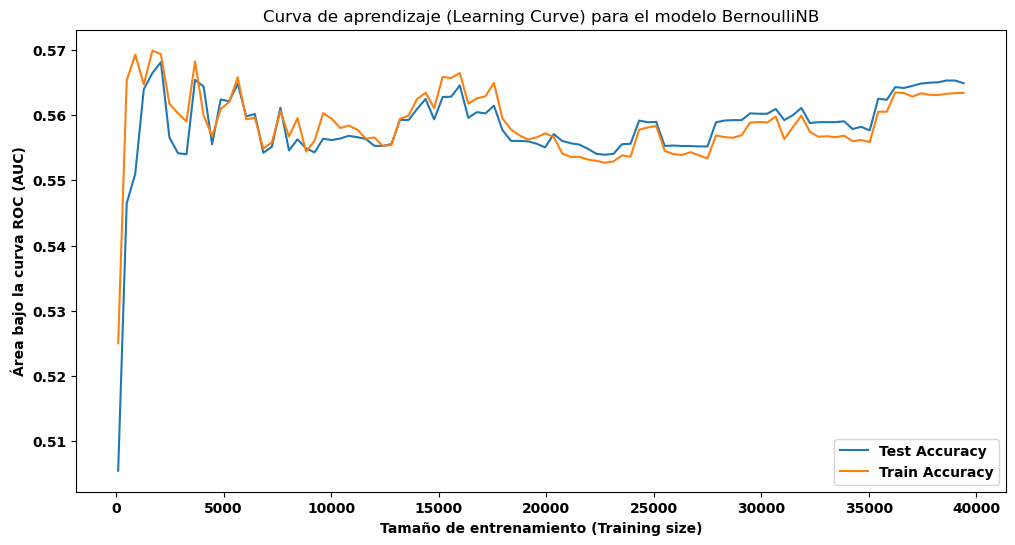

In [31]:
for i in range(num_samples_15_1_2.size):
    modelo_bernoulli_15_1.fit(X_train[:num_samples_15_1_2[i]], y_train[:num_samples_15_1_2[i]])

    train_score_15_1_2[i] = roc_auc_score(y_train[:num_samples_15_1_2[i]], modelo_bernoulli_15_1.predict(X_train[:num_samples_15_1_2[i]])) 
    test_score_15_1_2[i] = roc_auc_score(y_test, modelo_bernoulli_15_1.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_15_1_2[-1]-test_score_15_1_2[-1])

plt.plot(num_samples_15_1_2, test_score_15_1_2, label = 'Test Accuracy')
plt.plot(num_samples_15_1_2, train_score_15_1_2, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el modelo BernoulliNB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Área bajo la curva ROC (AUC)')
plt.legend(loc = 'lower right')
plt.show()

#### Análisis 15.1.2:
La primera curva de aprendizaje, la del clasificador Complement, a medida que aumenta el tamaño de entrenamiento en conjuntoo de test no mejora esto podía deberse a que el modelo tiene un alto riesgo de sufrir underfitting. El GAP es pequeño pero podemos que ambos conjuntos coinciden cuando el conjunto de entrenamiento es muy pequeño.

La segunda curva de aprendizaje, la del clasificador para modelos Bernoulli, el conjunto de test sigue la pista muy de cerca al conjunto de entrenamiento esto puede llegar a significar que el modelo se ajusta demasiado y el riesgo de overfitting es alto. El GAP es bastante pequeño y volvemos a ver coincidir a ambos conjuntos en varias ocasiones. Además, conergen y se mantienen en un AUC más baja que el primer modelo.

---

## Modelos de K vecinos más cercanos (*K-Nearest Neighbors* - __KNN__)

El algoritmo __K-vecinos más cercanos__ o simplemente __[KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)__ se aplica para resolver problemas de _clasificación_ y de _regresión_. _KNN_ es un ___lazy learner___ que no crea realmente ningún modelo en sí. Este método es un modelo de aprendizaje automático que no generaliza (__non-generalizing or instance-based learning__), ya que simplemente __memoriza todos los datos de su conjunto de entrenamiento__. En realidad, no hay una fase de entrenamiento para _KNN_.

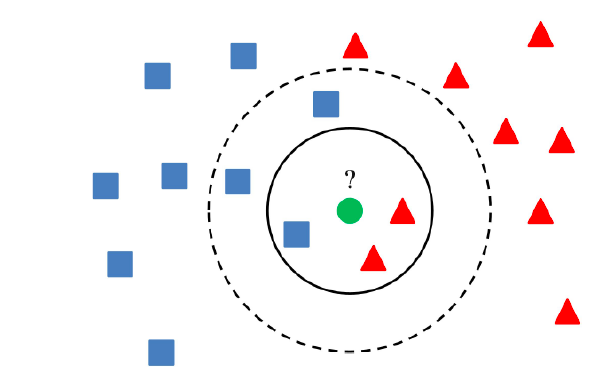

Dada una nueva observación como ___x___ de los datos de prueba, _KNN_ encontrará un número predefinido (___K___) de observaciones de los datos del entrenamiento más cercanas en distancia a  ___x___ y predecirá la clase a partir de ellas.   
El número ___K___ es una **constante definida por el analista** y se considera como el __hiperparámetro__ del modelo.  
La elección óptima del valor ___K___ depende en gran medida de los datos. Se puede decir que en general, **un número mayor** de vecinos más cercanos **disminuye los efectos de un posible ruido** en los datos, pero hace que **los límites de clasificación sean menos claros**. 

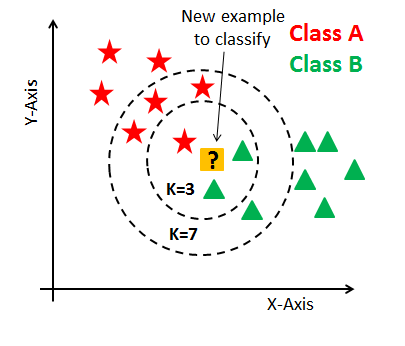



La clasificación se calcula generalmente a partir de un **voto de mayoría simple de los vecinos más cercanos** de ___x___. Sin embargo, en algunos casos **podemos ponderar a los vecinos** de modo que los vecinos más cercanos contribuyan más y que tengan un peso más grande a la hora de calcular la predicción.

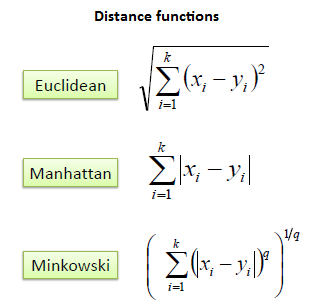

La medida de similitud o la cercanía de dos puntos que se mide como distancia, en general puede ser cualquier métrica, pero la **distancia Euclidiana estándar** es la opción más común. La **distancia de Minkowski** es una métrica en un espacio vectorial normado que puede considerarse como una generalización tanto de la _distancia Euclidiana_ como de la _distancia de Manhattan_.

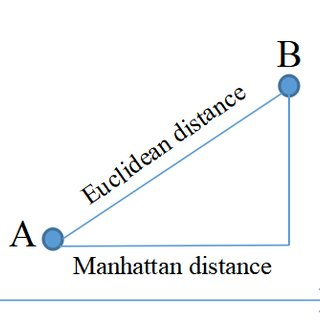

> #### **¡Atención!**  
> Es importante mantener las librerías actualizadas para poder utilizar todas las gamas de los moodelos de clasificación.
> En caso de tener problemas se puede usar el siguiente comando para actualizar las dependencias necesarias:  
>
> `pip install --upgrade numpy scipy scikit-learn threadpoolctl`  

Vamos a utilizar el método ___`KNeighborsClassifier`___ que es la técnica más común para aplicar el modelo *KNN*.

In [32]:
pip install --upgrade numpy scipy scikit-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn = KNeighborsClassifier()

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn = clas_knn.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

print('AUC:', roc_auc_score(y_test, y_pred_knn))

Acuuracy: 0.8982844381281089
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2404
           1       0.93      0.94      0.93      7447

    accuracy                           0.90      9851
   macro avg       0.86      0.86      0.86      9851
weighted avg       0.90      0.90      0.90      9851

AUC: 0.8569496767729895


La elección del valor ___K___ depende sustancialmente de los datos de entrenamiento.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn2 = KNeighborsClassifier(n_neighbors=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn2.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn2 = clas_knn2.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn2))

print(classification_report(y_test, y_pred_knn2))

print('AUC:', roc_auc_score(y_test, y_pred_knn2))

Acuuracy: 0.8496599330017257
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2404
           1       0.86      0.95      0.91      7447

    accuracy                           0.85      9851
   macro avg       0.82      0.74      0.77      9851
weighted avg       0.84      0.85      0.84      9851

AUC: 0.7435211881097861


Vamos a obtener más información acerca del modelo de clasificación usando las siguientes funciones:

In [35]:
# Parámetros indicados en la definicón del modelo
clas_knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 100,
 'p': 2,
 'weights': 'uniform'}

Vamos a hecer una serie de análisis para encontrar los mejores valores para el número de los vecinos más cercanos. 

### Curva de complejidad del modelo _KNN_ (**Model Complexity Curve**)

El mejor valor de n_neighbors podría ser = 3  que consigue un Accuracy = 0.9009237640848645


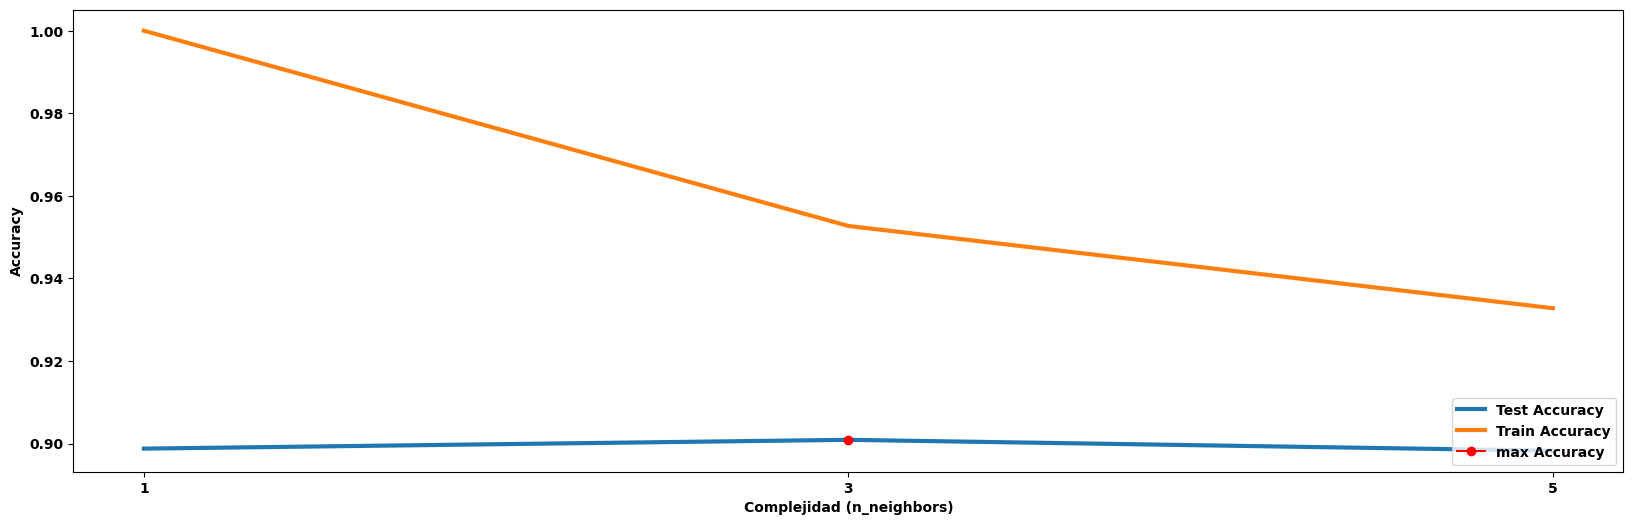

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.array([1,3,5])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=hiper_param[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de n_neighbors podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

Analizamos si nos conviene ponderar en base a la distancias a los vecinos más cercanos o no. Por defecto no se asignan pesos diferentes a los K vecinos más cercanos. 

El mejor valor de weights podría ser = distance  que consigue un Accuracy = 0.9022434270632423


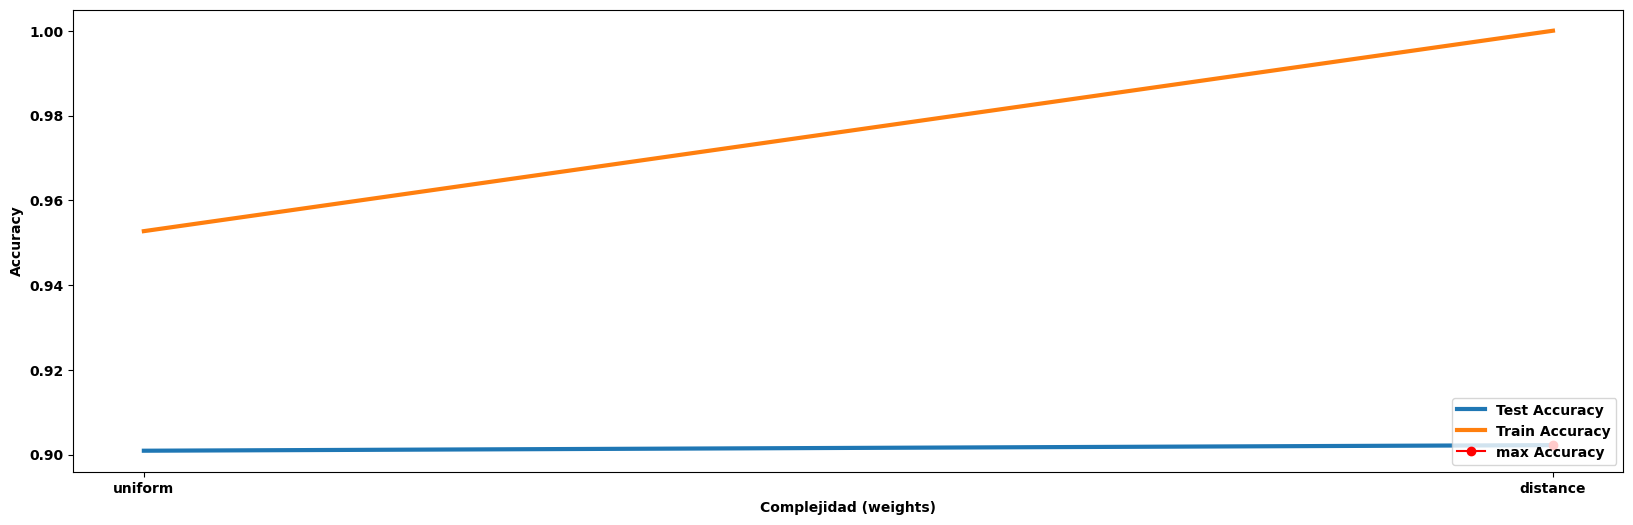

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.array(['uniform', 'distance'])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=3,
                                   weights=hiper_param[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de weights podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (weights)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

Analizamos las opciones de la métrica que se usa para medir la distancia. Hay varias formas para comprobar distintas medidas, una manera común consiste en cambiar el parámetro _q_ o _p_ en la función de _distancia de Minkowski_.

El mejor valor de p podría ser = 1  que consigue un Accuracy = 0.9101614049335093


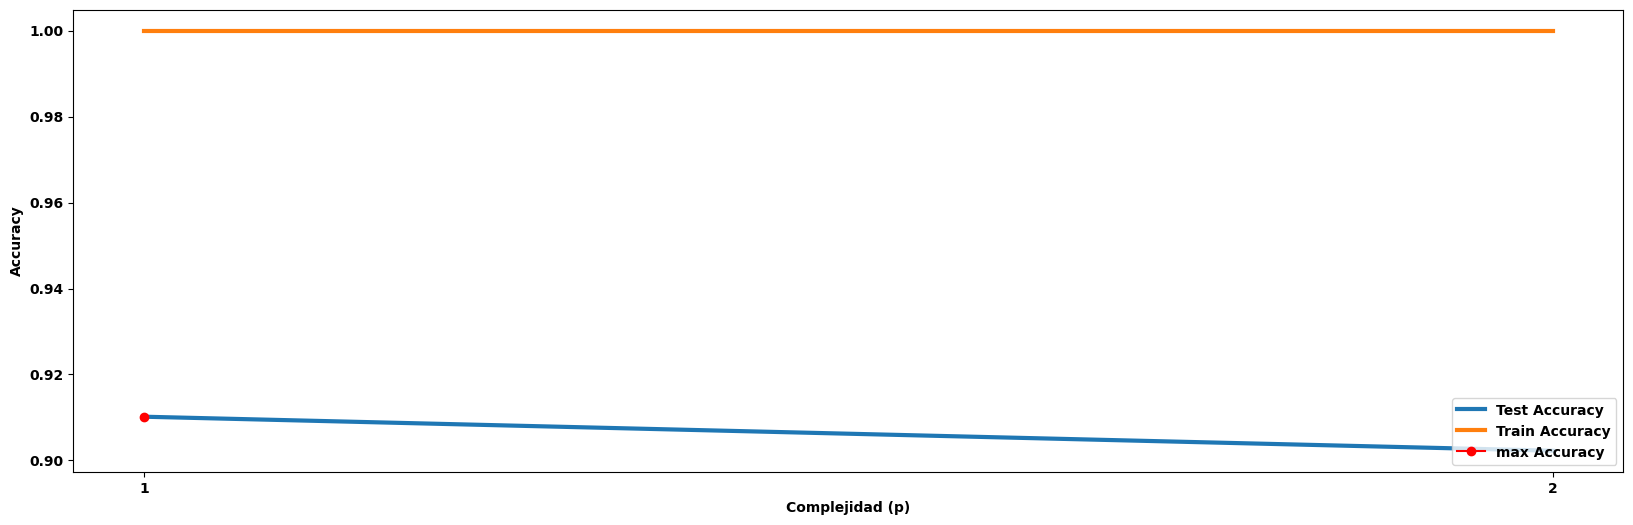

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.array([1, 2])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=3,
                                   weights='distance',
                                   p=hiper_param[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de p podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (p)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn_opt = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn_opt.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn_opt = clas_knn_opt.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn_opt))

print(classification_report(y_test, y_pred_knn_opt))

print('AUC:', roc_auc_score(y_test, y_pred_knn_opt))

Acuuracy: 0.9101614049335093
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2404
           1       0.94      0.94      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.88      0.88      0.88      9851
weighted avg       0.91      0.91      0.91      9851

AUC: 0.8777629804137814


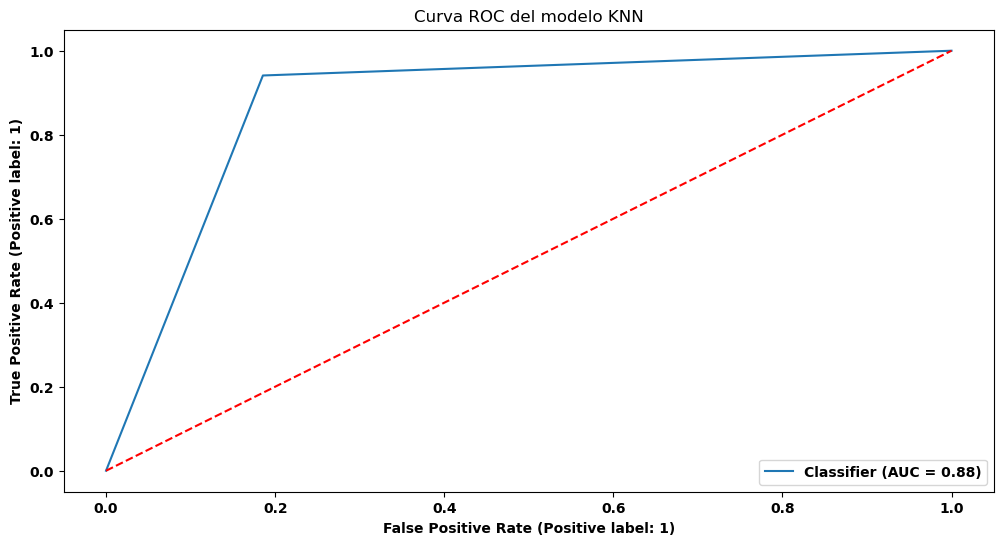

In [40]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_knn_opt)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Curva ROC del modelo KNN")
plt.show()

Los clasificadores de ___KNN___ pueden estar expuestos a _Overfitting_, especialmente **si se entrenan con una pequeña cantidad de datos** de entrenamiento y una **gran cantidad de features** o variables independientes. 

Con el fin de reducir el riesgo de sobreajuste en un clasificador KNN podríamos:
- **Aumentar el tamaño** del conjunto de entrenamiento
- Usar técnicas como la selección de variables para **reducir la dimensionalidad**
- Usar un **valor mayor para el hiperparámetro _K_** para conseguir un modelo más suave y menos sensible a los detalles específicos de los ejemplos de entrenamiento.

---

### **`Ejercicio 15.2`**

Define una nueva función para obtener la gráfica de *Learning Curve* para los clasificadores ___KNN___. Utiliza esta función nueva considerando los siguientes puntos para sacar las curvas de aprendizaje del modelo óptimo analizado en la sesión (_clas_knn_opt_) y también para el segundo modelo *clas_knn2* (con `n_neighbors=100`). Compara las dos gráficas y explíca y analiza el rendimiento de cada modelo:  

- Incluye los hiperparámetros de `n_neighbors`, `weights` y `p` indicando sus valores por defecto para cuando no se declaran en la llamada a la función.
- (*Sugerencia*: No incluyas más de `5` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [56]:
# Solución
# Ejercicio 15.2
from sklearn.neighbors import KNeighborsClassifier

def curva_aprendizaje_15_2(n_neighbors: int = 5, 
                            weights: any = "uniform",
                            p: int = 2):
        
    modelo = KNeighborsClassifier(n_neighbors=n_neighbors,
                                    weights=weights,
                                    p=p,
                                    n_jobs=-1)
    
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)
    num_xticks = np.linspace(100, X_train.shape[0], 5).astype(int)

    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.plot(num_samples[np.argmax(test_score)], max(test_score),
            marker='o', color = "red", label="Max Accuracy")
    
    plt.xticks(num_xticks)
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo KNeighborsClassifier')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show() 

La diferencia final del rendimiento del modelo entre training y test es=  0.08983859506649072


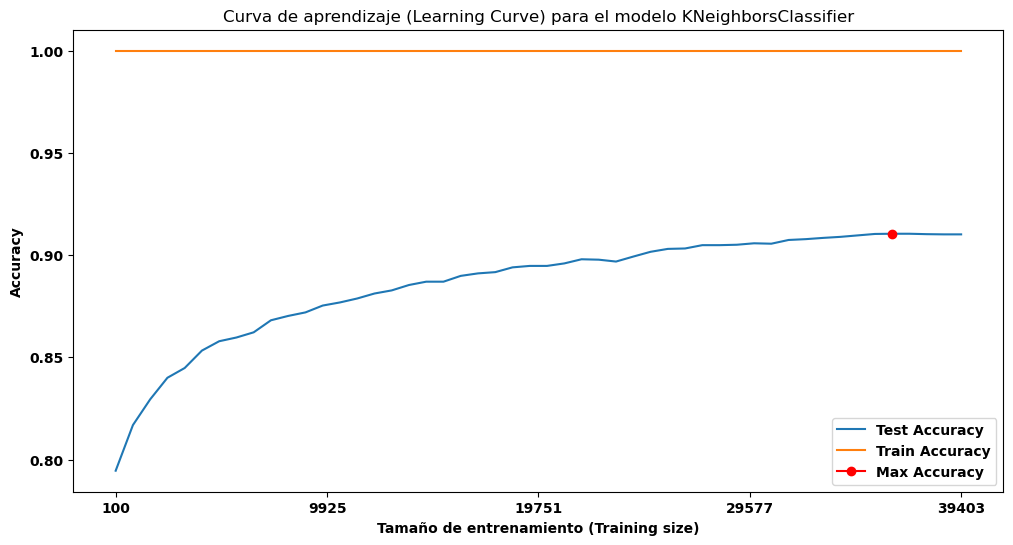

In [57]:
curva_aprendizaje_15_2(clas_knn_opt.n_neighbors, clas_knn_opt.weights, clas_knn_opt.p)

La diferencia final del rendimiento del modelo entre training y test es=  0.0018488353661650914


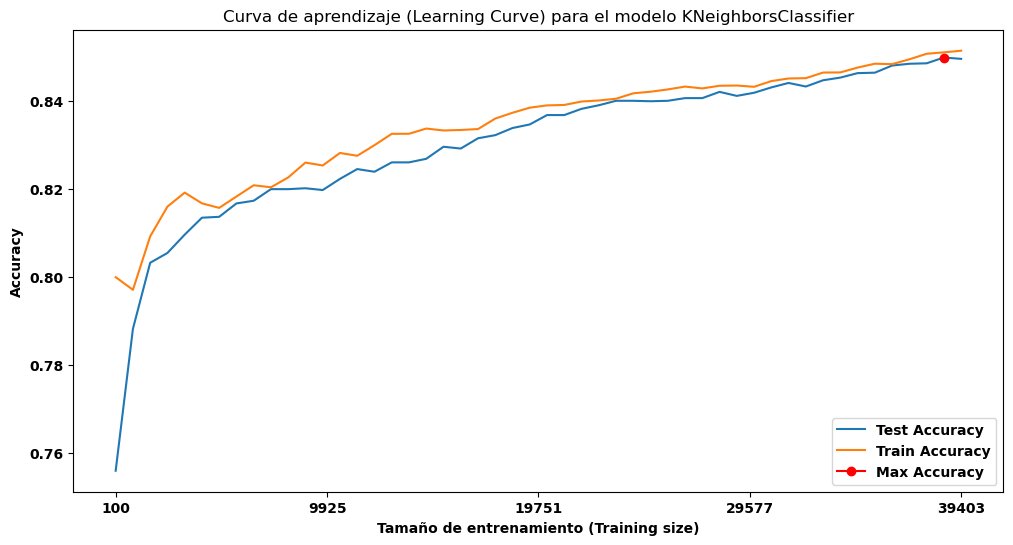

In [58]:
curva_aprendizaje_15_2(n_neighbors=clas_knn2.n_neighbors, weights=clas_knn2.weights, p=clas_knn2.p)

#### Análisis 15.2
La primera curva de aprendizaje, la del modelo clas_knn_opt a medida que el conjunto de entrenamiento crece el conjunt de test mejora, el GAP es algo amyor que en otros casos pero al tener el conjunto de test una tendencia ascendente podríamos iimaginar que el punto donde convergirán si se aumenta el conjunto de entrenamiento será con una buena accuracy.

La segunda curva de aprendizaje, la del modelo clas_knn2 a medida que el conjunto de entrenamiento crece el conjunto de test mejora, considero que podría tener riesgo de overfitting ya que el cnjunto de test sigue demasiado de cerca al conjunto de ntrenamiento, de hecho varias veces coinciden. 

---

## Modelos basados en las Máquinas de Vectores de Soporte (Support Vector Machines - **SVM**)

Las máquinas de vectores de soporte (**SVM**) son métodos de aprendizaje automático tipo _Supervised Learning_ muy potentes y flexibles que se utilizan para la _clasificación_, la _regresión_ e incluso la _detección de anomalías_. Las _SVM_ son **muy eficientes en espacios de alta dimensión** y generalmente se usan en problemas de _clasificación_. 

El objetivo principal de las _SVM_ es dividir los conjuntos de datos en varias clases para **encontrar un hiperplano marginal máximo (_maximum marginal hyperplane: MMH_)**, que se puede realizar en los siguientes dos pasos:

- Primero se **generan varios hiperplanos iterativamente** que separan las clases de la mejor manera.

- Luego se elegirá el hiperplano que separa las clases correctamente y **consigue un mayor margen**, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible.

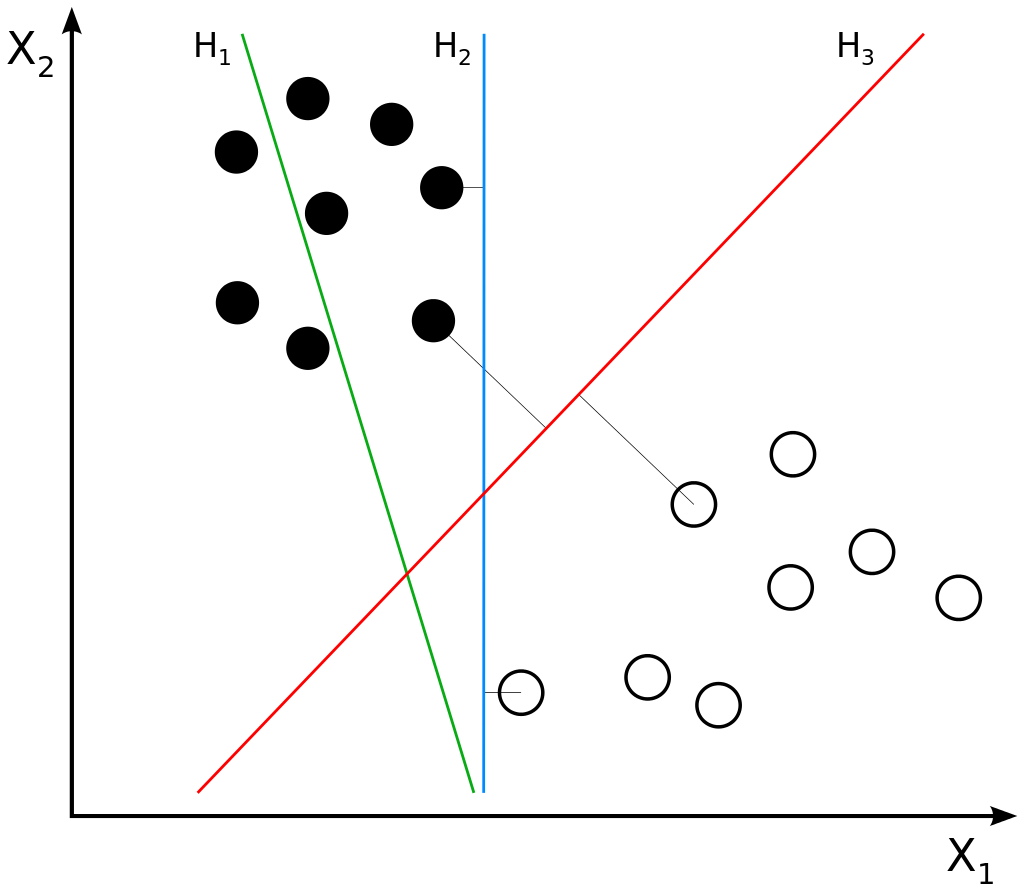

Algunos conceptos más importantes en SVM son los siguientes:

- **Hiperplano**: El **plano de decisión** o espacio que divide un conjunto de observaciones que tienen diferentes clases.

- **Vectores de Soporte**: Se pueden definir como los **puntos de datos más cercanos al hiperplano**. Los vectores de soporte son factores determinantes en la línea o el plano de separación.

- **Margen**: La brecha entre dos líneas en los puntos de datos más cercanos de diferentes clases.

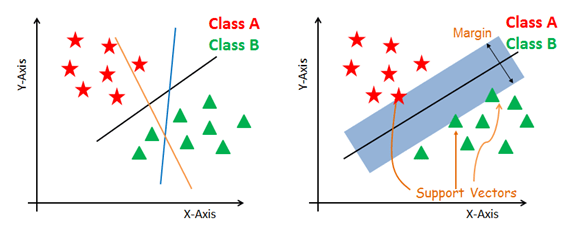

Algunos problemas **no se pueden resolver usando un hiperplano lineal**. Una estrategia eficaz cuando la separación necesaria de grupos es de tipo no lineal, consiste en **aumentar las dimensiones del espacio original**. Los métodos de _SVM_ utilizan una técnica llamada _truco del kernel (__Kernel Trick__)_ para transformar el espacio de entrada en un espacio dimensional superior. En el siguiente ejemplo, se pueden segregar fácilmente los puntos mediante la separación lineal, cuando se le añade una tercera dimensión.

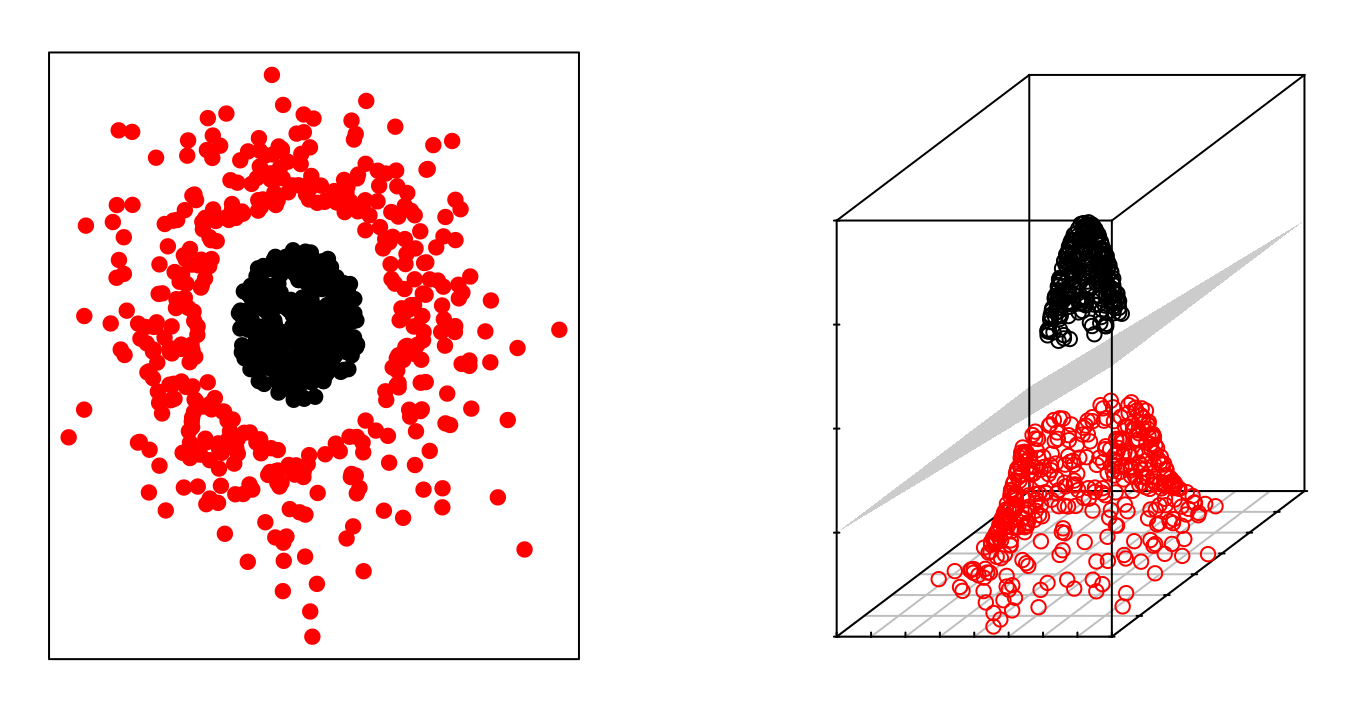

Los límites de separación lineales generados en el espacio dimensional superior, se convierten en límites de separación no lineales al proyectarlos en el espacio original. Existen variedades de kernels con funciones distintas, algunos de los más comúnes son: _Kernel lineal_, _Kernel polinómico_ y _Kernel RBF (Radial Basis Function)_ 


En la librería _sklearn_ existen diferentes clases para generar y ajustar los modelos de _SVM_. Entre las más utilizadas están:
- **`LinearSVC`**: _Linear Support Vector Classification_ que aplican el ___Kernel lineal___ y tienen una implementación muy optimizada que se ejecuta de forma __muy rápida__ para los problemas con grandes volúmenes de datos.

- **`SVC`**: _C-Support Vector Classification_ que permite aplicar ___Kernels no lineales___ con un tiempo de computación que __aumenta notablemente con el tamaño__ del dataset.

Vamos a aplicar estos métodos para el problema de clasifición de la calidad del aire.

In [44]:
from sklearn.svm import LinearSVC

clas_lsvc = LinearSVC(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_lsvc.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_lsvc = clas_lsvc.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_lsvc))

print(classification_report(y_test, y_pred_lsvc))

print('AUC:', roc_auc_score(y_test, y_pred_lsvc))

/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Acuuracy: 0.8399147294690894
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      2404
           1       0.86      0.94      0.90      7447

    accuracy                           0.84      9851
   macro avg       0.80      0.74      0.76      9851
weighted avg       0.83      0.84      0.83      9851

AUC: 0.7360897206593817


Existe un hiperparámetro llamodo **`C`** para ajustar la regularización en estos modelos. **`C`** en los modelos basod en _SVM_ controla el equilibrio entre la complejidad del modelo y la precisión en la clasificación de los datos de entrenamiento:

- Un valor **más pequeño** de **`C`**: Da como resultado una **regularización más fuerte**, lo que significa que el modelo _SVM_ buscará un hiperplano de separación más simple. Por lo tanto, el modelo tendrá un **margen más grande** y, a menudo, una mayor cantidad de puntos de entrenamiento clasificados incorrectamente (más expuesto a _**Underfitting**_).  
    - más sencillo, más generalizable
- Un valor **más grande** de **`C`**: Da como resultado una **regularización más débil**, lo que significa que el modelo _SVM_ buscará un hiperplano de separación más complejo y ajustado a los datos.  Por lo tanto, el modelo tendrá un **margen más pequeño** y un intento de clasificar todos los puntos de entrenamiento correctamente (más expuesto a _**Overfitting**_).  
    - modelo más complejo, muy ajustado...


Para encontrar el valor óptimo de este _hiperparámetro_ podemos realizar una búsqueda mediante el método de __Grid Search__:

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos la manera de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=5, shuffle=True, random_state=111) 

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo_svc = LinearSVC(random_state=100)
parametros = {"C": np.logspace(-5, 5, 20)
              } 

# Establecer el área bajo la curva de funcionamiento del receptor como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(roc_auc_score)   

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid_svc = GridSearchCV(estimator=modelo_svc,
                                 param_grid=parametros,
                                 scoring=scoreFun,
                                 cv=folds,
                                 n_jobs=-1)  
modelo_grid_svc.fit(X_train, y_train)

/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warning

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=LinearSVC(random_state=100), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring=make_scorer(roc_auc_score))

In [46]:
# Consultar el modelo óptimo
modelo_grid_svc.best_estimator_

LinearSVC(C=6.1584821106602545, random_state=100)

In [47]:
# Conseguir las predicciones y las métricas del clasificador óptimo
y_pred_lsvc_opt = modelo_grid_svc.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_lsvc_opt))

print(classification_report(y_test, y_pred_lsvc_opt))

print('AUC:', roc_auc_score(y_test, y_pred_lsvc_opt))

Acuuracy: 0.8405238046898792
              precision    recall  f1-score   support

           0       0.74      0.54      0.62      2404
           1       0.86      0.94      0.90      7447

    accuracy                           0.84      9851
   macro avg       0.80      0.74      0.76      9851
weighted avg       0.83      0.84      0.83      9851

AUC: 0.7374784863506885


Ahora aplicamos el método __`SVC`__ que por defecto utiliza un _kernel_ no lineal:

In [48]:
from sklearn.svm import SVC

clas_svc = SVC(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_svc.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_svc = clas_svc.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_svc))

print(classification_report(y_test, y_pred_svc))

print('AUC:', roc_auc_score(y_test, y_pred_svc))

Acuuracy: 0.8893513348898588
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      2404
           1       0.90      0.96      0.93      7447

    accuracy                           0.89      9851
   macro avg       0.87      0.82      0.84      9851
weighted avg       0.89      0.89      0.89      9851

AUC: 0.816956632191949


In [49]:
# Consultar el hiperparámetro óptimo conseguido con LinearSVC
modelo_grid_svc.best_params_['C']

6.1584821106602545

Probamos crear un nuevo modelo con el valor óptimo de ___`C`___ conseguido en la búsqueda de _Grid Search_ del método anterior como una aproximación.

In [50]:
from sklearn.svm import SVC

clas_svc2 = SVC(C=modelo_grid_svc.best_params_['C'], random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_svc2.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_svc2 = clas_svc2.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_svc2))

print(classification_report(y_test, y_pred_svc2))

print('AUC:', roc_auc_score(y_test, y_pred_svc2))

Acuuracy: 0.9029540148208304
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2404
           1       0.92      0.96      0.94      7447

    accuracy                           0.90      9851
   macro avg       0.88      0.85      0.86      9851
weighted avg       0.90      0.90      0.90      9851

AUC: 0.8479254507784014


Para estos modelos que cuentan con _Kernels_ no lineales, existe otro hiperparámetro llamado ___`gamma`___ que controla la influencia de los puntos de datos cercanos en la función de decisión y por lo tanto, define el grado de no linealidad del modelo:  

- Un valor **más pequeño** de **`gamma`**: Significa que la influencia de los puntos de datos es menor, lo que puede resultar en un modelo _SVM_ con **fronteras de decisión más suaves** y **menos ajustadas** a los datos. (podrían tener menos precisión y estar más propenso a _**Underfiiting**_)  

- Un valor **más grande** de **`gamma`**:  Significa que la influencia de los puntos de datos es mayor, lo que puede resultar en un modelo _SVM_ con **fronteras de decisión más ajustadas** y **más sensible a los detalles locales** en los datos de entrenamiento. (podrían tener una mayor precisión, pero estar más propenso a _**Overfitting**_)

Podemos probar algunos otros valores del hiperparámetro ___gamma___ para ajustar un kernel con una mayor no linealidad. 

In [51]:
from sklearn.svm import SVC

clas_svc3 = SVC(C=modelo_grid_svc.best_params_['C'], gamma=0.75, random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_svc3.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_svc3 = clas_svc3.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_svc3))

print(classification_report(y_test, y_pred_svc3))

print('AUC:', roc_auc_score(y_test, y_pred_svc3))

Acuuracy: 0.9213277839813216
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2404
           1       0.94      0.96      0.95      7447

    accuracy                           0.92      9851
   macro avg       0.90      0.89      0.89      9851
weighted avg       0.92      0.92      0.92      9851

AUC: 0.885711887018793


Los clasificadores de ___SVM___ pueden estar expuestos a _Overfitting_, especialmente **si se entrenan con una pequeña cantidad de datos** de entrenamiento y una **gran cantidad de features** o variables independientes. 

Con el fin de reducir el riesgo de sobreajuste en un clasificador _SVM_ podríamos:
- **Aumentar el tamaño** del conjunto de entrenamiento.
- Usar técnicas como la selección de variables para **reducir la dimensionalidad**
- Usar un **valor más pequeño para el hiperparámetro _`C`_** para conseguir un modelo con más margen que suelen generalizar mejor.
- **No usar valores muy elevados para el hiperparámetro _`gamma`_** que aumenta el grado de no linealidad del _Kernel_.

---

### **`Ejercicio 15.3`**

Define una nueva función para obtener la gráfica de *Learning Curve* para los clasificadores ___SVC___. Utiliza esta función nueva considerando los siguientes puntos para sacar las curvas de aprendizaje del último modelo desarrollado en la sesión (*clas_svc3*) y también para el modelo por defecto *clas_svc*. Compara las dos gráficas y explíca y analiza el rendimiento de cada modelo:

- Incluye los hiperparámetros de `C` y `gamma` indicando sus valores por defecto para cuando no se declaran en la llamada a la función.  
- considera `random_state=100`
- (*Sugerencia*: No incluyas más de `4` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [59]:
## Solución
# Ejercicio 15.3
from sklearn.svm import SVC

def curva_aprendizaje_15_3(c: float = 1, 
                           gamma: str = 'scale'):
    
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)
    num_xticks = np.linspace(100, X_train.shape[0], 4).astype(int)
    
    modelo = SVC(C=c,
                gamma=gamma,
                random_state=100)
    
    train_score = np.zeros(num_samples.size)
    test_score = np.zeros(num_samples.size)


    for i in range(num_samples.size):
       

        modelo.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo.predict(X_train[:num_samples[i]]))
        test_score[i] = accuracy_score(y_test, modelo.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.plot(num_samples, test_score, label='Test Accuracy')
    plt.plot(num_samples, train_score, label='Train Accuracy')
    plt.plot(num_samples[np.argmax(test_score)], max(test_score),
            marker='o', color = "red", label="Max Accuracy")
    
    plt.xticks(num_xticks)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


La diferencia final del rendimiento del modelo entre training y test es=  0.03012261319655818


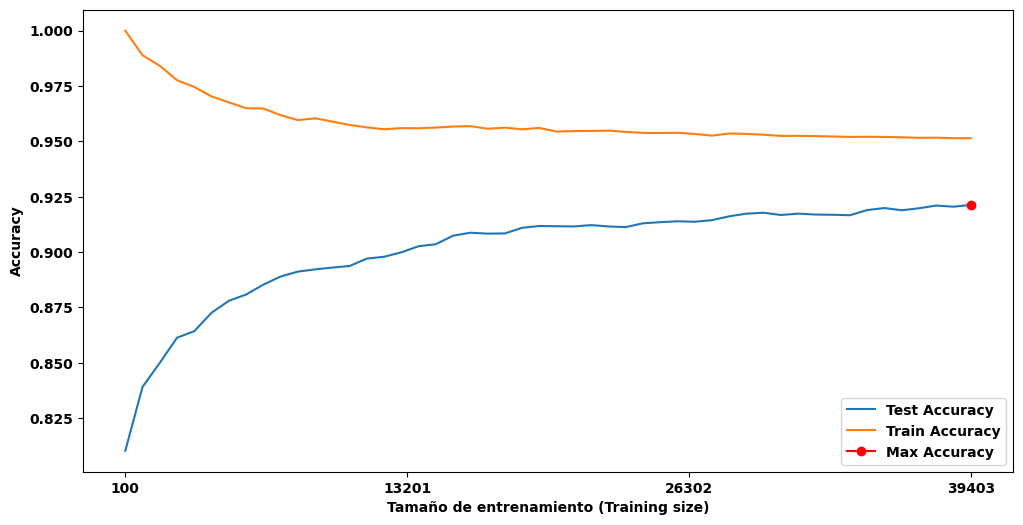

In [60]:
curva_aprendizaje_15_3(c=clas_svc3.C, gamma=clas_svc3.gamma)

La diferencia final del rendimiento del modelo entre training y test es=  0.0015199185679997118


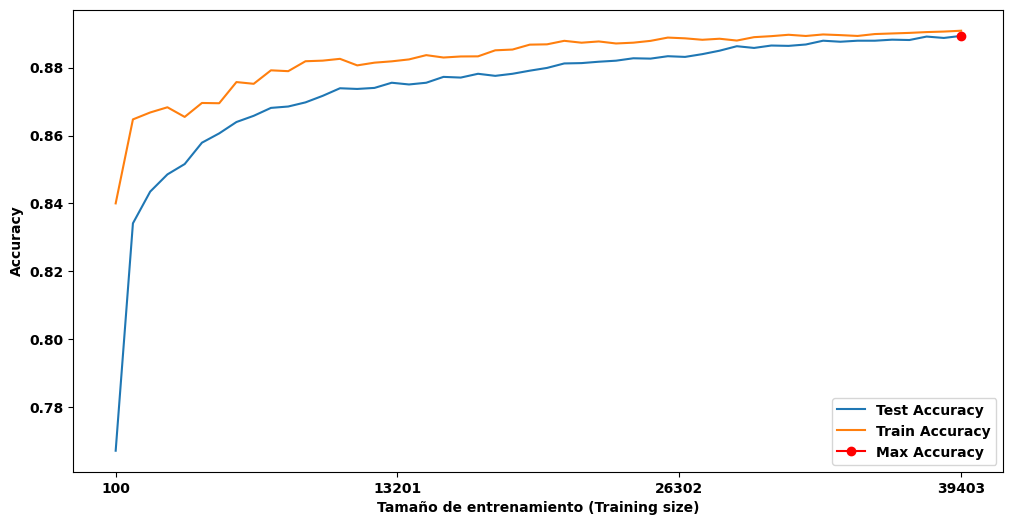

In [62]:
curva_aprendizaje_15_3(c=clas_svc.C, gamma=clas_svc.gamma)

#### Análisis 15.3
La primera curva de aprendizaje, la del modelo class_svc3, a medida que aumenta el conjunto de entrenamiento mejora el conjunto de test. El GAP no es demasiado grande por lo que podemos imaginar que a medida que el conjunto de entrenamiento siga creciendo convergirán en un buen nivel de accuracy.

La segunda curva de aprendizaje, la del modelo de clas_svc, a medida que el conjunto de entrenamiento crece el conjunto de test mejora. El GAP es mucho más pequeño, y a pesar de que no podemos ver donde convergen podemos estar seguros que lo hará si el conjunto de entrenamiento crece. Además el punto de accuracy donde ocurrirá la convergencia es algo menor quue en la primera pero aún así muy bueno.